# OPIS ZADATKA

Korištenjem AVL balansiranog stabla implementirati stablo za indeksiranje zapisa iz baze podataka. Baza podataka u obliku tekstualne datoteke sadrži zapise o filmovima. Podatkovni skup je zadan u datoteci *movie.txt* te se sastoji od preko 500,000 zapisa. 

Prikaz isječka iz podatkovnog skupa:

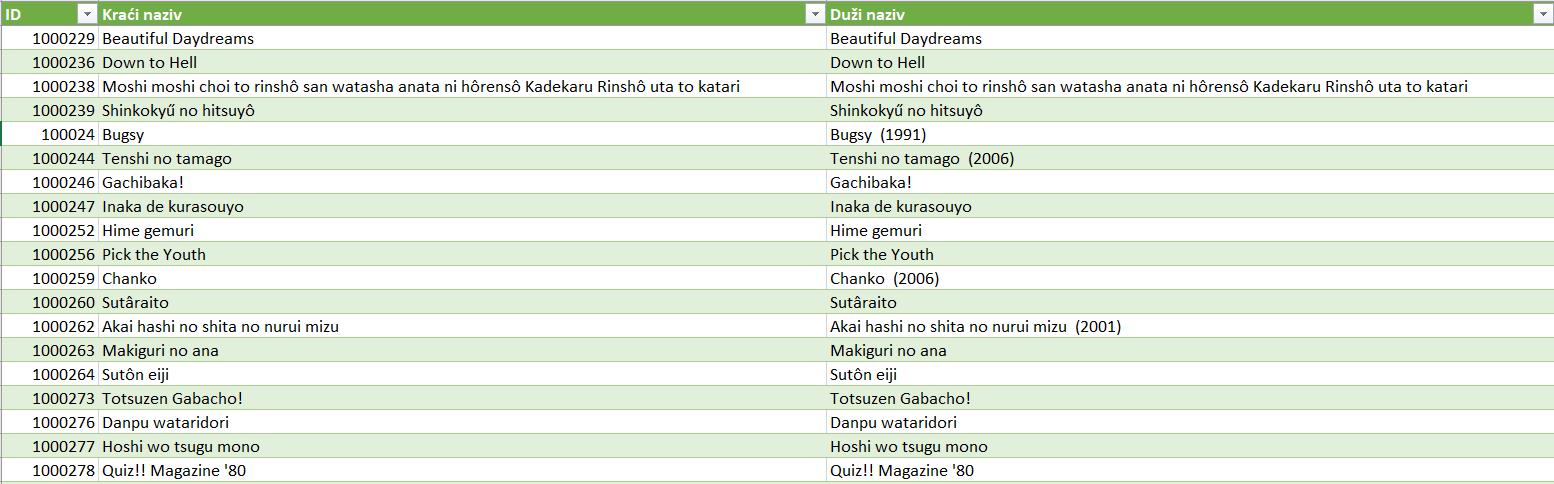

Struktura zapisa u datotekama je takva da su dijelovi odnosno polja zapisa odvojena tabulatorom ("\t") unutar jednog retka datoteke. Prilikom čitanja podataka, zapise iz datoteke treba čitati redak po redak te za svaki zapis izdvojiti dijelove zapisa kao zasebna polja te nad njima napraviti čišćenje praznih znakova. 

Prema tome treba realizirati odgovarajuću strukturu zapisa podatka, primjerice razred naziva *MoviesData*, za potrebe pohrane podataka iz datoteke a koja bi prema sadržaju zapisa trebao imati atribute koje se odnose na ID zapisa cjelobrojnog tipa te kraći i duži naziv filma tekstualnog tipa.
 
Stablo indeksa treba oblikovati po atributu koji se odnosi na kraći naziv filma.

Kao polazište implementacije zadataka mogu se iskoristiti kodovi koji su dani ispod te ih onda treba prilagoditi odnosno dopuniti sukladno zahtjevima zadataka:

* U razredu *BinaryNode*: potrebno je proširiti čvor stabla s objektom razreda *MoviesData*, a postojeća vrijednost *value* razreda *BinaryNode* bi trebala biti indeksni ključ. 
* Konstruktor odnosno \_\_init\_\_() metoda treba primiti dvije vrijednosti: ključ (*value*) i objekt navedenog tipa. 
* Metodu *add()* za umetanje novog čvora također treba urediti sukladno proširenju implementacije.

## ZADACI KOJE TREBA IMPLEMENTIRATI

a) Na temelju sadržaja tekstualne datoteke treba izgraditi AVL stablo uporabom razreda *BinaryTree* temeljem kraćeg naziva filma kao indeksnog ključa. Ispisati visinu dobivenog AVL stabla.

b) Implementirati pretraživanje podataka o filmu uporabom implementiranog indeksa i to tako da se za traženje može zadati kraći naziv filma cjelovito ili djelomično u obliku prefiksa korištenjem znaka '\*'. Primjerice, može se unijeti cjeloviti naziv 'Bugsy' ili samo dio odnosno prefiks naziva 'Bug*'. Nakon što je podatak pronađen treba ispisati cijeli zapis: ID, kraći naziv, duži naziv.

c) Implementirati funkciju za traženje u rangu npr. sve filmove od 'Pick*' do 'Ten*', ili od 'F*' do 'M*'. Rangove treba moći zadati proizvoljno.

d) Ispisati minimalnu i maksimalnu vrijednost indeksa i pripadnih podataka za te indekse.

e) Za proizvoljno zadani cijeli broj koji će imati značenje rednog broja te slijedom toga ispisati visinu čvora koji se nalazi na tom rednom broju u uzlazno sortiranom redoslijedu indeksnih ključeva stabla.

f) Napraviti metode za ispis broja lijevih rotacija i broja desnih rotacija kod umetanja čvora u stablo.

g) Ispisati stablo po razinama počevši od korijena prema dolje u cik-cak redoslijedu. To znači da se čvorovi na prvoj razini ispisuju s lijeva na desno, na drugoj razini s desna na lijevo, pa na trećoj razini s lijeva na desno itd. Ispis raditi po razinama, odnosno svaku razinu ispisati u posebnom retku.
Primjer za stablo na slici treba dobiti sljedeći ispis: 

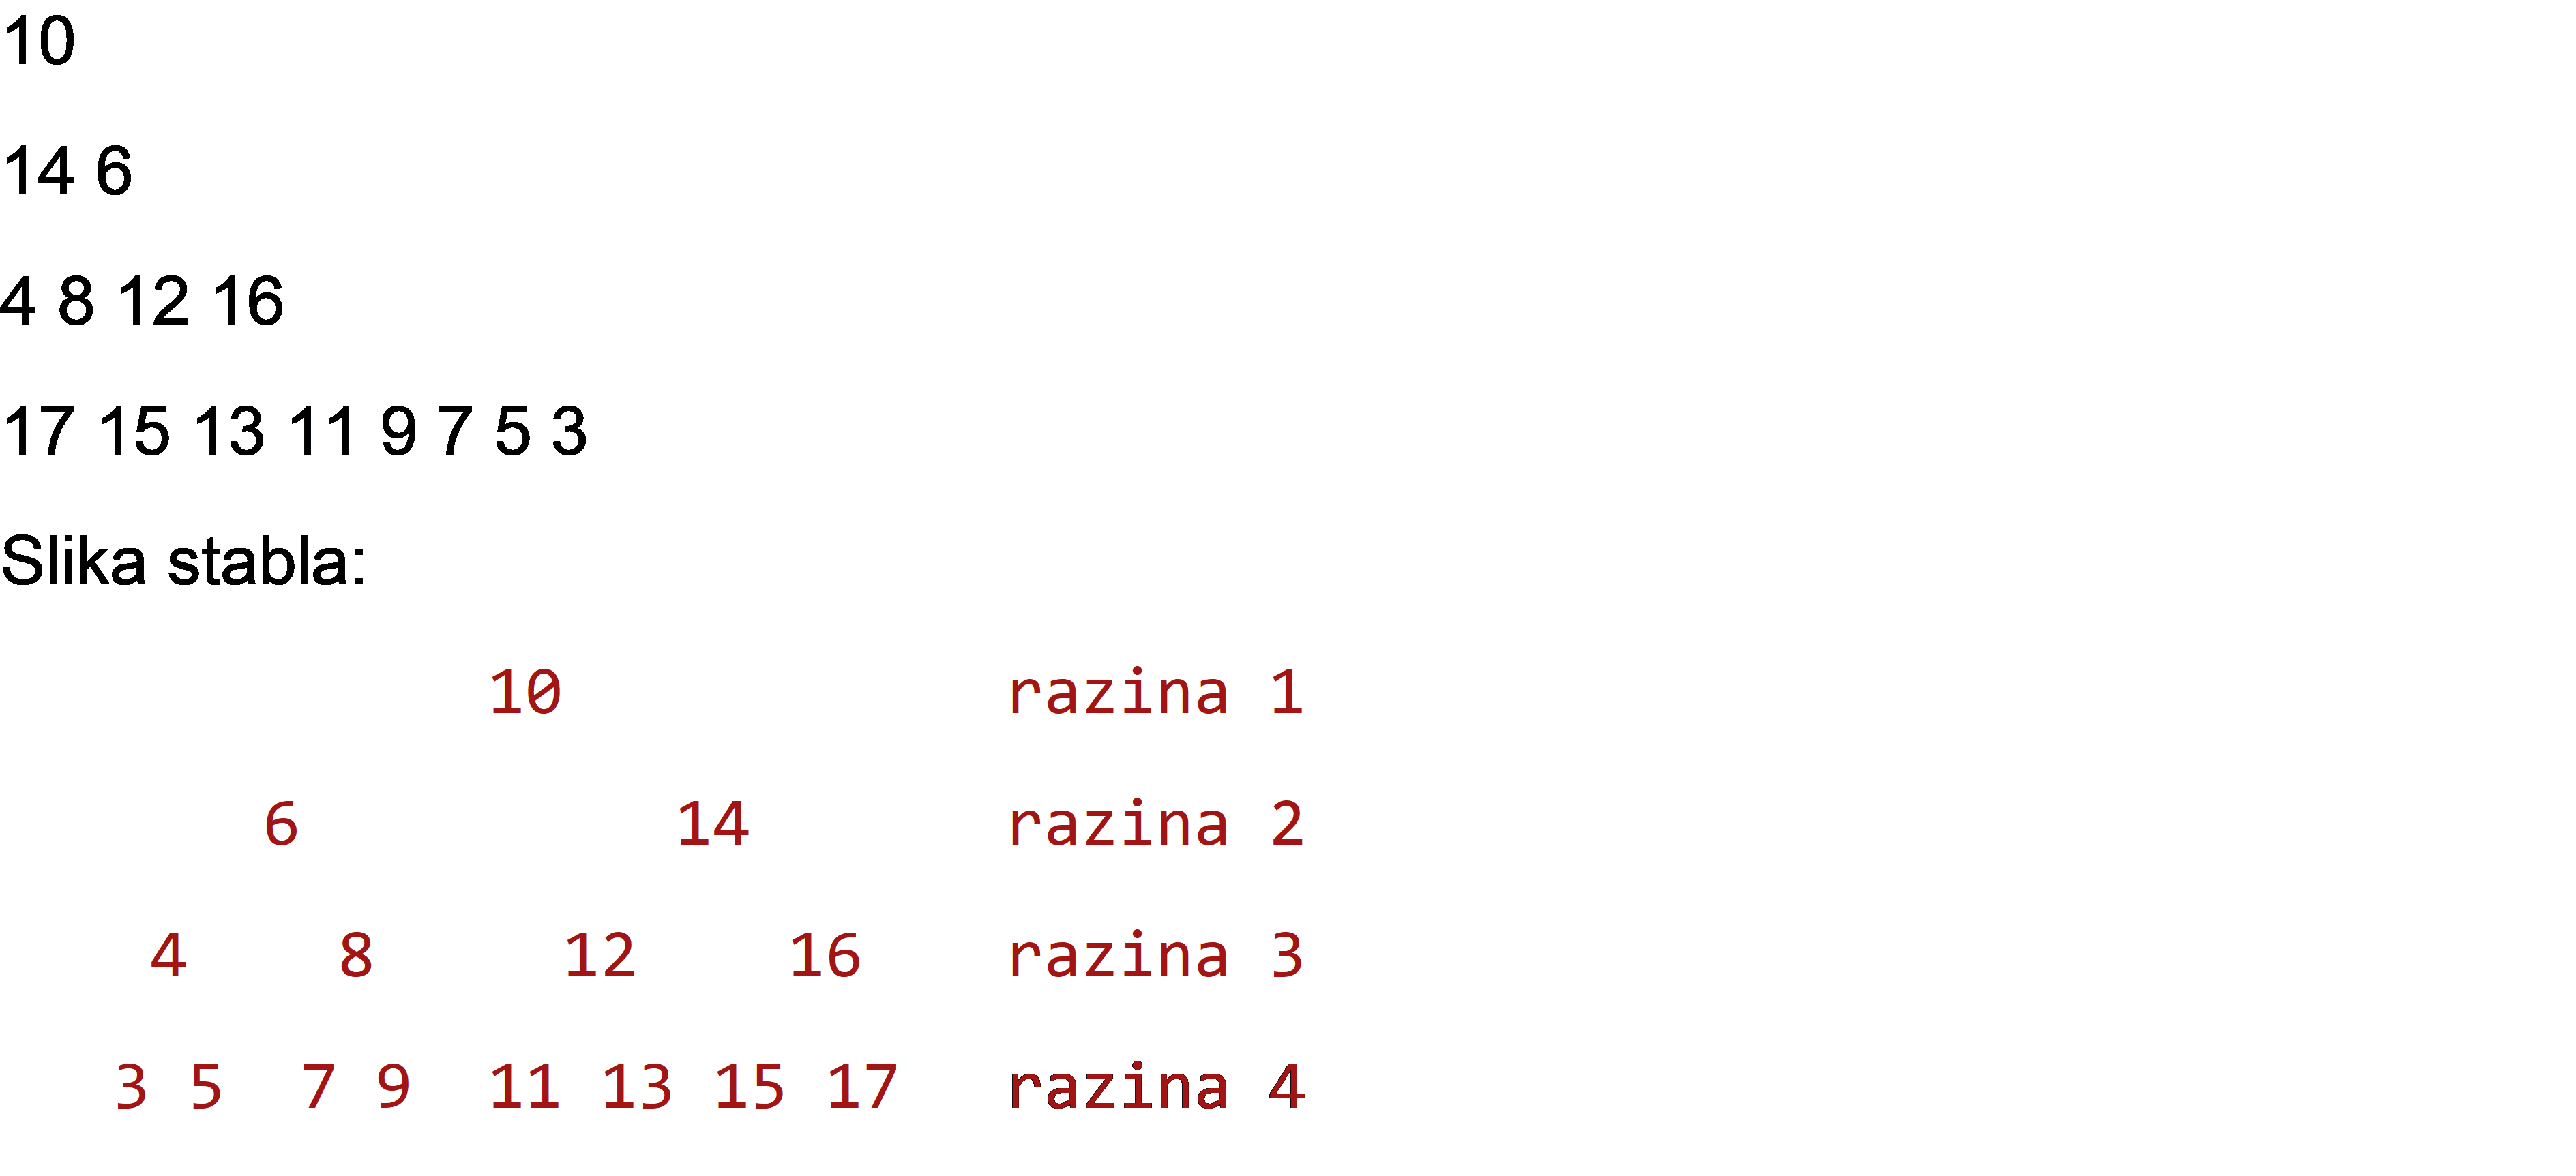

Zbog velikog broja podataka dovoljno je ispisati samo prvih 10 razina. 

h) Nasumično birati zapise iz skupa podataka i graditi obično nebalansirano binarno stablo pretraživanja sve dok je to moguće. Zabilježiti visinu takvog nebalansiranog stabla te ponoviti postupak za isti niz zapisa u izgradnji AVL stabla za koji također treba zabilježiti visinu dobivenog stabla.

# SADRŽAJ RADA

## Opis i analiza složenosti poduzetih postupaka 



***

a) U AVL stablo učitava se 30000 redaka (filmova). Funkcija korištena za učitavanje filmova *get_movies_from_file()* je reda složenosti $O(1)$ jer uvijek učitava konstantan broj (30000) filmova. Potom se u AVL stablo dodaje svaki film for petljom koja isto ima složenost $O(1)$ zbog konstantnog broja filmova.

b) Pretraživanje se obavlja funkcijama *search_keys()* i *find_matching_keys_recursive()*. Kompiliranje regex uzorka u *search_keys()* je reda složenosti $O(m)$ gdje je $m$ duljina uzorka te rekurzivno pretraživanje stabla u *find_matching_keys_recursive()* gdje treba u najgorem slučaju proći svaki čvor je $O(n)$. Stoga je cijela implementacija reda složenosti $O(n)$.

c) Pretraživanje se obavlja funkcijama *search_keys_in_range()* i *search_keys_in_range_recursive*. Kompiliranje regex uzorka u *search_keys_in_range()* je reda složenosti $O(m)$ gdje je $m$ duljina uzorka te rekurzivno pretraživanje stabla u *find_matching_keys_recursive()* gdje treba proći raspon čvorova je $O(\log n + k)$ gdje $k$ broj čvorova u rasponu te $n$ broj čvorova. Stoga je cijela implementacija reda složenosti $O(\log n)$.

d) Pretraživanje minimalnog i maksimalnog indeksa obavlja se funkcijom *find_min_max_indices()* koja je reda složenosti $O(n)$ jer mora proći sve čvorove stabla kako bi obavila usporedbu sa svakim čvorom. Inicijaliziraju se "maksimalni" i "minimalni" stringovi te se rade usporedbe sa svakim čvorom.

e) Prvo se funkcijom *get_sorted_indices()* sortiraju svi indeksi (imena filmova) pohranjeni u listi. Pythonova list metoda sort() se izvodi Timsort algoritmom čija je složenost $O(n \log n)$. Funkcija *print_node_height()* pronalazi određeni čvor što je reda složenosti $O(n)$ jer potencijalno mora proći kroz sve čvorove drva. Prevladavajuća radnja je sortiranje reda $O(n \log n)$ stoga je cijela implementacija reda $O(n \log n)$.

f) Funkcijom *search_node()* pretražuje se stablo dok se ne nađe čvor što je reda složenosti $O(\log n)$. Funkcijom *print_rotations()* ispisuju se atributi (kojima je proširen razred BinaryNode) čvorova *left_rotations* i *right_rotations* što je operacija reda $O(1)$. Inicijalno pri stvaranju čvora ovi atributi su postavljeni na vrijednost 0 te tokom dodavanja u drvo u metodi *add()* se vrijednosti rotacija mijenjaju. Ukupna složenost ove implementacije je $O(\log n)$ zbog pretraživanja.

g) Ispis stabla u cik-cak redoslijedu realiziran je funkcijom *print_levels_zig_zag()*. Prolazak kroz stablo je reda složenosti $O(n)$ jer mora proći svaki čvor kako bi se ispisao. Ispis je napravljen pomoću Python razreda *deque* čije operacije *append* i *popleft* su konstantne složenosti $O(1)$. Implementacija je stoga složenosti $O(n)$.

h) Dodana je implementacija običnog binarnog stabla *BinaryTreeNonAVL* kako bi se maknulo svojstvo balansiranja. Ubacivanje čvora u AVL stablo je reda složenosti $O(\log n)$, a u nebalansirano binarno stablo $O(n)$. Ispis visina je konstante složenosti, stoga je prevladavajuća složenost reda $O(n)$.

***

# POČETNI PROGRAMSKI KÔD

#### Implementacija AVL stabla

In [1]:
class BinaryNode:

    # Dodani atributi movie, left_rotations, right_rotations
    def __init__ (self, value = None, movie = None):
        """Create binary node."""
        self.value  = value
        self.left   = None
        self.right  = None
        self.height = 0
        self.movie = movie
        self.left_rotations = 0
        self.right_rotations = 0
        
    def computeHeight (self):
        """Compute height of node in BST."""
        height = -1
        if self.left:
            height = max(height, self.left.height)
        if self.right:
            height = max(height, self.right.height)
            
        self.height = height + 1

    def dynamicHeight (self):
        """Compute height of node in BST."""
        height = -1
        if self.left:
            height = max(height, self.left.dynamicHeight())
        if self.right:
            height = max(height, self.right.dynamicHeight())
            
        return height + 1

    def dynamicHeightDifference (self):
        """Compute height difference of node's children in BST."""
        leftTarget = 0
        rightTarget = 0
        if self.left:
            leftTarget = 1 + self.left.dynamicHeight()
        if self.right:
            rightTarget = 1 + self.right.dynamicHeight()
            
        return leftTarget - rightTarget

    def heightDifference (self):
        """Compute height difference of node's children in BST."""
        leftTarget = 0
        rightTarget = 0
        if self.left:
            leftTarget = 1 + self.left.height
        if self.right:
             rightTarget = 1 + self.right.height
                   
        return leftTarget - rightTarget

    def assertAVLProperty (self):
        """Validate AVL property for BST node."""
        if abs(self.dynamicHeightDifference()) > 1:
            return False
        if self.left:
            if not self.left.assertAVLProperty():
                return False
        if self.right:
            if not self.right.assertAVLProperty():
                return False

        return True

    def rotateRight (self):
        """Perform right rotation around given node."""
        newRoot = self.left
        grandson = newRoot.right
        self.left = grandson
        newRoot.right = self

        self.computeHeight()
        
        return newRoot

    def rotateLeft (self):
        """Perform left rotation around given node."""
        newRoot = self.right
        grandson = newRoot.left
        self.right = grandson
        newRoot.left = self
    
        self.computeHeight()
        return newRoot

    def rotateLeftRight (self):
        """Perform left, then right rotation around given node."""
        child = self.left
        newRoot = child.right
        grand1  = newRoot.left
        grand2  = newRoot.right
        child.right = grand1
        self.left = grand2
    
        newRoot.left = child
        newRoot.right = self
    
        child.computeHeight()
        self.computeHeight()
        
        return newRoot

    def rotateRightLeft (self):
        """Perform right, then left rotation around given node."""
        child = self.right
        newRoot = child.left
        grand1  = newRoot.left
        grand2  = newRoot.right
        child.left = grand2
        self.right = grand1
    
        newRoot.left = self
        newRoot.right = child
    
        child.computeHeight()
        self.computeHeight()
      
        return newRoot

    def compareTo (self, value):
        """
        Returns 0 if equal, negative if smaller and positive if greater.
        Suitable for overriding.
        """
        if self.value == value:
            return 0
        if self.value < value:
            return -1
        return +1
    
    # Dodan parametar movie
    def add (self, val, movie):
        """Adds a new node to BST with value and rebalance as needed."""
        newRoot = self

        # if val <= self.value        
        if self.compareTo(val) >= 0:
            self.left = self.addToSubTree (self.left, val, movie)
            if self.heightDifference() == 2:
                #if val <= self.left.value:
                
                if self.left.compareTo(val) >= 0:
                    newRoot = self.rotateRight()
                    self.right_rotations += 1
                else:
                    newRoot = self.rotateLeftRight()
                    self.right_rotations += 1
                    self.left_rotations += 1
        else:
            self.right = self.addToSubTree (self.right, val, movie)
            if self.heightDifference() == -2:
                #if val > self.right.value:
                if self.right.compareTo(val) < 0:
                    newRoot = self.rotateLeft()
                    self.left_rotations += 1
                else:
                    newRoot = self.rotateRightLeft()
                    self.right_rotations += 1
                    self.left_rotations += 1

        newRoot.computeHeight()
        return newRoot

    # Dodan parametar movie
    def newNode (self, val, movie):
        """Return new Binary Node, amenable to subclassing."""
        return BinaryNode(val, movie)

    # Dodan parametar movie
    def addToSubTree (self, parent, val, movie):
        """Add val to parent subtree (if exists) and return root in case it has changed because of rotation."""
        if parent is None:
            return self.newNode(val, movie)
        parent = parent.add(val, movie)
        return parent
           
    def removeFromParent (self, parent, val):
        """Helper method for remove. Ensures proper behavior when removing node that 
        has children."""
        if parent:
            return parent.remove(val)
        return None

    def remove (self, val):
        """
         Remove val from BinaryTree. Works in conjunction with remove
         method in BinaryTree.
        """
        newRoot = self
        rc = self.compareTo(val)
        if rc == 0:
            if self.left is None:
                return self.right

            child = self.left
            while child.right:
                child = child.right
            
            childKey = child.value;
            self.left = self.removeFromParent(self.left, childKey)
            self.value = childKey;

            if self.heightDifference() == -2:
                if self.right.heightDifference() <= 0:
                    newRoot = self.rotateLeft()
                else:
                    newRoot = self.rotateRightLeft()
        elif rc > 0:
            self.left = self.removeFromParent(self.left, val)
            if self.heightDifference() == -2:
                if self.right.heightDifference() <= 0:
                    newRoot = self.rotateLeft()
                else:
                    newRoot = self.rotateRightLeft()
        else:
            self.right = self.removeFromParent(self.right, val)
            if self.heightDifference() == 2:
                if self.left.heightDifference() >= 0:
                    newRoot = self.rotateRight()
                else:
                    newRoot = self.rotateLeftRight()

        newRoot.computeHeight()
        return newRoot

    def __repr__ (self):
        """Useful debugging function to produce linear tree representation."""
        leftS = ''
        rightS = ''
        if self.left:
            leftS = str(self.left)
        if self.right:
            rightS = str(self.right)
        return "(L:" + leftS + " " + str(self.value) + " R:" + rightS + ")"

    def inorder (self):
        """In order traversal generator of tree rooted at given node."""
        if self.left:
            for n in self.left.inorder():
                yield n

        yield self.value

        if self.right:
            for n in self.right.inorder():
                yield n

class BinaryTree:

    def __init__ (self):
        """Create empty binary tree."""
        self.root = None

    def __repr__ (self):
        if self.root is None:
            return "avl:()"
        return "avl:" + str(self.root)
    
    # Dodan parametar movie
    def newNode (self, value, movie):
        """Return new BinaryNode object. Suitable for overriding."""
        return BinaryNode(value, movie)
    
    # Dodan parametar movie
    def add (self, value, movie):
        """Insert value into proper location in Binary Tree."""
        if self.root is None:
            self.root = self.newNode(value, movie)
        else:
            self.root = self.root.add(value, movie)

    def __contains__ (self, target):
        """Check whether BST contains target value."""
        node = self.root
        while node:
            rc = node.compareTo(target)
            if rc > 0:
                node = node.left
            elif rc < 0:
                node = node.right
            else:
                return True
        return False
     
    def remove (self, val):
        """Remove value from tree."""
        if self.root:
            self.root = self.root.remove(val)

    def __iter__ (self):          # definira iteriranje kroz inorder ispis
        """In order traversal of elements in the tree."""
        if self.root:
            return self.root.inorder()
                        
    def assertAVLProperty (self):
        """Validate AVL property for BST Tree."""
        if self.root:
            return self.root.assertAVLProperty()
        else:
            return True

#### Implementacija razreda MoviesData

In [2]:
class MoviesData:

    def __init__(self, id, short_name, long_name):
        self.id = id
        self.short_name = short_name
        self.long_name = long_name

    def __str__(self) -> str:
        return f'{self.id} | {self.short_name} | {self.long_name}'

def extract_rows() -> None:
    # redovi 185297-200296, 387649-402648
    file1 = open('movie.txt', "r")

    my_rows = []

    for idx, row in enumerate(file1.readlines()):

        if idx >= 185297 and idx <= 200296 or idx >= 387649 and idx <= 402648:
            my_rows.append(row)

    file2 = open("movie09.txt", "w")
    file2.writelines(my_rows)

def convert_row_to_movie(row: str) -> MoviesData:
    movie_list = row.split("\t")
    movie_list[-1] = movie_list[-1].strip()
    movie_list[1] = movie_list[1].rstrip()
    movie_list[1] = movie_list[1].lstrip()
    movie_obj = MoviesData(*movie_list)
    return movie_obj

def get_movies_from_file() -> list[MoviesData]:
    file = open('movie09.txt', 'r')
    movies = [convert_row_to_movie(row) for row in file.readlines()]
    return movies

# IMPLEMENTACIJA ISPITNOG KODA SUKLADNO ZADACIMA

a) Na temelju sadržaja tekstualne datoteke treba izgraditi AVL stablo uporabom razreda *BinaryTree* temeljem kraćeg naziva filma kao indeksnog ključa. Ispisati visinu dobivenog AVL stabla.

In [3]:
#extract_rows()

myTree = BinaryTree() 

movies = get_movies_from_file()
    
for m in movies:
    myTree.add(m.short_name, m)

print(f'Visina: {myTree.root.height}')

Visina: 17


b) Implementirati pretraživanje podataka o filmu uporabom implementiranog indeksa i to tako da se za traženje može zadati kraći naziv filma cjelovito ili djelomično u obliku prefiksa korištenjem znaka '\*'. Primjerice, može se unijeti cjeloviti naziv 'Bugsy' ili samo dio odnosno prefiks naziva 'Bug*'. Nakon što je podatak pronađen treba ispisati cijeli zapis: ID, kraći naziv, duži naziv.

In [4]:
import re

def search_keys(root: BinaryNode, pattern: str) -> list[MoviesData]:
        
        matches = []

        if "*" in pattern:
            pattern = list(pattern)
            pattern[-1] = "."
            pattern.append("*")
            pattern = "".join(pattern)
        
        regex = re.compile(pattern)

        find_matching_keys_recursive(root, regex, matches)
        return matches

def find_matching_keys_recursive(node: BinaryNode, regex: re.Pattern, matches: list) -> None:

    if node is not None:

        if regex.fullmatch(node.value):
            matches.append(node.movie)
            
        find_matching_keys_recursive(node.left, regex, matches)
        find_matching_keys_recursive(node.right, regex, matches)

find1 = "The End"

rez = search_keys(myTree.root, find1)
for i in rez:
    print(i)

find2 = "Country Girls*"

rez = search_keys(myTree.root, find2)
for i in rez:
    print(i)

497625 | The End | The End  (1996)
1902342 | Country Girls in Heat | Country Girls in Heat
1902343 | Country Girls in Heat 2 | Country Girls in Heat 2


c) Implementirati funkciju za traženje u rangu npr. sve filmove od 'Pick*' do 'Ten*', ili od 'F*' do 'M*'. Rangove treba moći zadati proizvoljno.

In [5]:
def search_keys_in_range(root: BinaryNode, start: str, end: str) -> list[MoviesData]:

    if "*" in start:
        start = list(start)
        start[-1] = "."
        start.append("*")
        start = "".join(start)

    if "*" in end:
        end = list(end)
        end[-1] = "."
        end.append("*")
        end = "".join(end)

    matches = []

    regex1 = re.compile(start)
    regex2 = re.compile(end)
    
    def search_keys_in_range_recursive(node: BinaryNode) -> None:

        if node is None:
            return
        
        if node.value > start:
            search_keys_in_range_recursive(node.left)

        if (start <= node.value <= end and regex1.fullmatch(node.value) or
            start <= node.value <= end and regex2.fullmatch(node.value) or
            start <= node.value <= end):
            matches.append(node.movie)

        if node.value < end:
            search_keys_in_range_recursive(node.right)
    
    search_keys_in_range_recursive(root)
    return matches

p1 = "Pick*"
p2 = "Ten*"

rez = search_keys_in_range(myTree.root, p1, p2)
for i in rez:
    print(i)

501570 | Pickersgill People | Pickersgill People
1938416 | Picking Miss Octane | Picking Miss Octane
1953987 | Pickles for Nickels | Pickles for Nickels
501501 | Picknick | Picknick
48890 | Pickup on 101 | Pickup on 101
505495 | Picnic Stops | Picnic Stops
480410 | Picnic at Hanging Rock | Picnic at Hanging Rock
1982210 | Picture Claire | Picture Claire  (2001)
494513 | Picture Mommy Dead | Picture Mommy Dead  (1966)
507547 | Picture People No. 1: Stars in Defense | Picture People No. 1: Stars in Defense
507548 | Picture People No. 2: Hollywood Sports | Picture People No. 2: Hollywood Sports
198773 | Picture Snatcher | Picture Snatcher
487160 | Picture of Light | Picture of Light  (1994)
499578 | PicturePages | PicturePages
193138 | Pidey | Pidey  (2006)
50512 | Pido Dida 3: May kambal na | Pido Dida 3: May kambal na
491608 | Pie Eating 101: 101 Years of Pie | Pie Eating 101: 101 Years of Pie  (2001)
484728 | PieNegro | PieNegro  (2006)
480886 | Pieces of Peace | Pieces of Peace  (2010

d) Ispisati minimalnu i maksimalnu vrijednost indeksa i pripadnih podataka za te indekse.

In [6]:
def find_min_max_indices(root: BinaryNode) -> tuple[MoviesData, MoviesData]:
    
    max_string = ""
    min_string = "\U0010FFFF" * 100
    min_movie = None
    max_movie = None

    def traverse_check_min_max(node: BinaryNode) -> None:

        nonlocal min_string, max_string, min_movie, max_movie

        if node is None:
            return
        
        if node.value < min_string:
            min_string = node.value
            min_movie = node.movie

        if node.value > max_string:
            max_string = node.value
            max_movie = node.movie

        traverse_check_min_max(node.left)
        traverse_check_min_max(node.right)

    traverse_check_min_max(root)
    return min_movie, max_movie

min_movie, max_movie = find_min_max_indices(myTree.root)

print(f'Min indeks: {min_movie.short_name}, podatak: {min_movie}')
print(f'Max indeks: {max_movie.short_name}, podatak: {max_movie}')

Min indeks: #Indignados, podatak: 50162 | #Indignados | #Indignados  (2011)
Max indeks: ventyr i pyjamas, podatak: 191030 | ventyr i pyjamas | ventyr i pyjamas


e) Za proizvoljno zadani cijeli broj koji će imati značenje rednog broja te slijedom toga ispisati visinu čvora koji se nalazi na tom rednom broju u uzlazno sortiranom redoslijedu indeksnih ključeva stabla.

In [7]:
def get_sorted_indices(movies: list[MoviesData]) -> list[str]:
    names = list(map(lambda m: m.short_name, movies))
    names.sort()
    return names

def print_node_height(node: BinaryNode, num: int, indices: list[str]) -> None:
    index = indices[num - 1]
    
    def traverse_print_height(node: BinaryNode) -> None:
        
        nonlocal index

        if node is None:
            return

        if node.value == index:
            print(f'Found {index} at height {node.height}')
            return

        traverse_print_height(node.left)
        traverse_print_height(node.right)

    traverse_print_height(node)

indices = get_sorted_indices(movies)
num = 551
print_node_height(myTree.root, num, indices)

Found A Law Unto Herself at height 1


f) Napraviti metode za ispis broja lijevih rotacija i broja desnih rotacija kod umetanja čvora u stablo.

In [8]:
def search_node(key: str, root: BinaryNode) -> BinaryNode:
    if root is None or root.value == key:
        return root
    if key > root.value:
        return search_node(key, root.right)
    return search_node(key, root.left)

def print_rotations(movie_name: str, tree: BinaryTree) -> None:
    node = search_node(movie_name, tree.root)
    print(f'Rotations for movie {movie_name}: {node.left_rotations} left, {node.right_rotations} right.')

for m in movies[:5]:
    print_rotations(m.short_name, myTree)

Rotations for movie A Yank in Viet-Nam: 7 left, 7 right.
Rotations for movie Jayam Kondaan: 3 left, 3 right.
Rotations for movie The Phoenix and the Carpet: 4 left, 3 right.
Rotations for movie Lucid Possession: 2 left, 1 right.
Rotations for movie The Fakers: 3 left, 4 right.


g) Ispisati stablo po razinama počevši od korijena prema dolje u cik-cak redoslijedu. To znači da se čvorovi na prvoj razini ispisuju s lijeva na desno, na drugoj razini s desna na lijevo, pa na trećoj razini s lijeva na desno itd. Ispis raditi po razinama, odnosno svaku razinu ispisati u posebnom retku.
Primjer za stablo na slici treba dobiti sljedeći ispis: 

In [9]:
from collections import deque

def print_levels_zig_zag(root: BinaryNode, max_levels: int) -> None:

    if not root:
        return
    
    queue = deque([root])
    level = 0
    
    while level < max_levels:

        level_size = len(queue)
        current_level = []
        
        for _ in range(level_size):

            node = queue.popleft()
            current_level.append(node.value)
            
            if node.left:
                queue.append(node.left)
            
            if node.right:
                queue.append(node.right)

        if level % 2 == 0:
            print(' || '.join(current_level))
        else:
            print(' || '.join(reversed(current_level)))
        #print(' || '.join(current_level))

        level += 1

print_levels_zig_zag(myTree.root, 10)

Or Else Alone
The End: Chapter 2 - The Casting Couch || Esok masih ada
Chan's Beach || Law of the Ranger || Ruby & Lilly Kick the Habit || Trilogia - Il pensiero, lo sguardo, la parola
What Is a Picture? || The Phoenix and the Carpet || Som e Fria - O Filme || Raja Gopichand || Ms all del corazn || Jayam Kondaan || Deedar || Aventuri la Marea Neagra
Aau fung yee || Bloomberg Morning News || Country Girls in Heat || Du bois pour l'hiver || Gza mshvidobisa, Jako! || L'art || Lucid Possession || Notorious C.H.O. || Piata || Rincon criollo || Seemabaddha || Telegrama Nmero Nove || The Latest Vampire || The Truck of Dreams || Valadio, o Cratera || Women of Glamour
Z Bolas e o Famoso Telegrama No. 9 || White Way, a Life Experience || Vrooom Vroom Vrooom || Un dentiste exemplaire || Tianshi qingren || The Secret Fury || The Moon Stalker || The Groan || The Blue Marble || Stozeit - Rush Hour || Shirley Chisholm for President || Sarang sarang nae sarang || Romance of the West || Regular Mainten

h) Nasumično birati zapise iz skupa podataka i graditi obično nebalansirano binarno stablo pretraživanja sve dok je to moguće. Zabilježiti visinu takvog nebalansiranog stabla te ponoviti postupak za isti niz zapisa u izgradnji AVL stabla za koji također treba zabilježiti visinu dobivenog stabla.

In [10]:
class BinaryNodeNonAVL:

    def __init__ (self, value = None, movie = None):
        """Create binary node."""
        self.value  = value
        self.left   = None
        self.right  = None
        self.height = 0
        self.movie = movie
        
    def computeHeight (self):
        """Compute height of node in BST."""
        height = -1
        if self.left:
            height = max(height, self.left.height)
        if self.right:
            height = max(height, self.right.height)
            
        self.height = height + 1

    def dynamicHeight (self):
        """Compute height of node in BST."""
        height = -1
        if self.left:
            height = max(height, self.left.dynamicHeight())
        if self.right:
            height = max(height, self.right.dynamicHeight())
            
        return height + 1

    def dynamicHeightDifference (self):
        """Compute height difference of node's children in BST."""
        leftTarget = 0
        rightTarget = 0
        if self.left:
            leftTarget = 1 + self.left.dynamicHeight()
        if self.right:
            rightTarget = 1 + self.right.dynamicHeight()
            
        return leftTarget - rightTarget

    def heightDifference (self):
        """Compute height difference of node's children in BST."""
        leftTarget = 0
        rightTarget = 0
        if self.left:
            leftTarget = 1 + self.left.height
        if self.right:
             rightTarget = 1 + self.right.height
                   
        return leftTarget - rightTarget

    def compareTo (self, value):
        """
        Returns 0 if equal, negative if smaller and positive if greater.
        Suitable for overriding.
        """
        if self.value == value:
            return 0
        if self.value < value:
            return -1
        return +1
    
    # Izbrisane rotacije
    def add (self, val, movie):
        """Adds a new node to BST with value."""
        newRoot = self
      
        if self.compareTo(val) >= 0:
            self.left = self.addToSubTree (self.left, val, movie)
        else:
            self.right = self.addToSubTree (self.right, val, movie)

        newRoot.computeHeight()
        return newRoot

    # Dodan parametar movie
    def newNode (self, val, movie):
        """Return new Binary Node, amenable to subclassing."""
        return BinaryNodeNonAVL(val, movie)

    # Dodan parametar movie
    def addToSubTree (self, parent, val, movie):
        """Add val to parent subtree (if exists) and return root in case it has changed because of rotation."""
        if parent is None:
            return self.newNode(val, movie)
        parent = parent.add(val, movie)
        return parent
           
    def removeFromParent (self, parent, val):
        """Helper method for remove. Ensures proper behavior when removing node that 
        has children."""
        if parent:
            return parent.remove(val)
        return None

    def remove (self, val):
        """
         Remove val from BinaryTree. Works in conjunction with remove
         method in BinaryTree.
        """
        newRoot = self
        rc = self.compareTo(val)
        if rc == 0:
            if self.left is None:
                return self.right

            child = self.left
            while child.right:
                child = child.right
            
            childKey = child.value;
            self.left = self.removeFromParent(self.left, childKey)
            self.value = childKey;

        elif rc > 0:
            self.left = self.removeFromParent(self.left, val)
        else:
            self.right = self.removeFromParent(self.right, val)

        newRoot.computeHeight()
        return newRoot

    def __repr__ (self):
        """Useful debugging function to produce linear tree representation."""
        leftS = ''
        rightS = ''
        if self.left:
            leftS = str(self.left)
        if self.right:
            rightS = str(self.right)
        return "(L:" + leftS + " " + str(self.value) + " R:" + rightS + ")"

    def inorder (self):
        """In order traversal generator of tree rooted at given node."""
        if self.left:
            for n in self.left.inorder():
                yield n

        yield self.value

        if self.right:
            for n in self.right.inorder():
                yield n

class BinaryTreeNonAVL:

    def __init__ (self):
        """Create empty binary tree."""
        self.root = None

    def __repr__ (self):
        if self.root is None:
            return "avl:()"
        return "avl:" + str(self.root)
    
    # Dodan parametar movie
    def newNode (self, value, movie):
        """Return new BinaryNode object. Suitable for overriding."""
        return BinaryNodeNonAVL(value, movie)
    
    # Dodan parametar movie
    def add (self, value, movie):
        """Insert value into proper location in Binary Tree."""
        if self.root is None:
            self.root = self.newNode(value, movie)
        else:
            self.root = self.root.add(value, movie)

    def __contains__ (self, target):
        """Check whether BST contains target value."""
        node = self.root
        while node:
            rc = node.compareTo(target)
            if rc > 0:
                node = node.left
            elif rc < 0:
                node = node.right
            else:
                return True
        return False

           
    def remove (self, val):
        """Remove value from tree."""
        if self.root:
            self.root = self.root.remove(val)

    def __iter__ (self):          # definira iteriranje kroz inorder ispis
        """In order traversal of elements in the tree."""
        if self.root:
            return self.root.inorder()
                        
    def assertAVLProperty (self):
        """Validate AVL property for BST Tree."""
        if self.root:
            return self.root.assertAVLProperty()
        else:
            return True

In [11]:
import random

binaryTree = BinaryTreeNonAVL()
AVLTree = BinaryTree()

movies = get_movies_from_file()

random.seed(50)
random.shuffle(movies)

while movies:
    m = movies.pop()
    binaryTree.add(m.short_name, m)
    AVLTree.add(m.short_name, m)

print(f'Visina nebalansiranog stabla: {binaryTree.root.height}')
print(f'Visina balansiranog stabla: {AVLTree.root.height}')

Visina nebalansiranog stabla: 35
Visina balansiranog stabla: 17
